In [1]:
import pandas as pd
import os
import sys
import re
import ast
from ast import literal_eval
import plac
import random
from pathlib import Path
import spacy
import re
from spacy.util import minibatch, compounding
import seaborn as sns

In [2]:
pip install plac

Note: you may need to restart the kernel to use updated packages.


In [11]:

os.getcwd()

'C:\\Users\\Swaroop'

In [9]:
os.listdir()

['.conda',
 '.condarc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.spyder-py3',
 '.VirtualBox',
 '01 assignment part a.ipynb',
 '01 assignment part b.ipynb',
 '01_introduction.ipynb',
 '02_operators.ipynb',
 '03_control flow.ipynb',
 '04. list.ipynb',
 '05. Tuples.ipynb',
 '06. Functions.ipynb',
 '07. Data files.ipynb',
 '08. lambda functions.ipynb',
 '09. List comprehensions.ipynb',
 '10. class and objects.ipynb',
 '11.   Numpy.ipynb',
 '1614173191814_MCL605LabFinalExamIncompleteRCode.ipynb',
 '201046013_ThejasTR_1stsessional.ipynb',
 '3 a. patterns.ipynb',
 '3D Objects',
 'amazon',
 'amazonPdv',
 'anaconda3',
 'AppData',
 'Application Data',
 'assign 1 part b.ipynb',
 'assign 2 part b.ipynb',
 'AssignmentLab5thNov_201046018-1.ipynb',
 'Audio Feature Extraction-1.py.ipynb',
 'Audio Feature Extraction-2.py.ipynb',
 'Audio Feature Extraction-3.py.ipynb',
 'BeautifulSoupPractice.ipynb',
 'beautiful_soup_mit_swaroop.ipynb',
 'bhanu1.ipynb',
 'bhanu2.ipynb',
 'bhan

In [12]:
df = pd.read_csv("data_job_posts.csv")

In [14]:
df.shape

(19001, 24)

<AxesSubplot:>

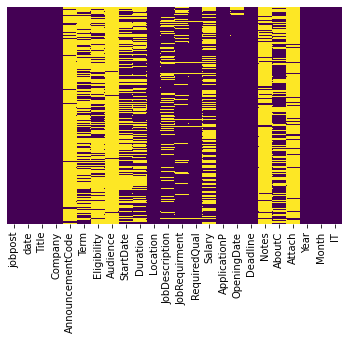

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [19]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [20]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [21]:
df["Title"].nunique() # number of unique job titles


8636

In [22]:
df.nunique()

jobpost             18892
date                 4391
Title                8636
Company              4554
AnnouncementCode     1014
Term                  411
Eligibility           663
Audience              216
StartDate            1186
Duration             1515
Location              759
JobDescription      12861
JobRequirment       14182
RequiredQual        16688
Salary               2692
ApplicationP        14187
OpeningDate          3344
Deadline             5202
Notes                1031
AboutC               6016
Attach               1495
Year                   12
Month                  12
IT                      2
dtype: int64

In [32]:
class trainDataGenerator(object):
    def __init__(self ,text):
        self.text = text
        self.entities = []

    def add_entity(self, searchTerm='' ,entity_name=''):
        try:
            reponse= re.search(searchTerm,self.text)
            data_entity=(response.start(), response.end(), entity_name)
            self.entities.append(data_entity)
        except Exception as e: 
            pass
    
    def complete_entity(self):
        entity_tem= {"entities": self.entities}
        data= (self.text, entity_tem)
        entities = entity_tem.get("entities")
    
        for i in range(0,len(entities)):
            for j in range(i+1,len(entities)):
            
                startIndex1=entities[i][0]
                endIndex1=entities[i][1]
            
                startIndex2= entities[j][0]
                endIndex2= entities[j][1]
        
                if startIndex1 in range(startIndex2,endIndex2):
                    return False
                if endIndex1 in range(startIndex2,endIndex2):
                    return False
            
        return data
        

In [33]:
TRAIN_DATA=[]

In [35]:
for x in df[["jobpost","Title","Company","Salary","Eligibility","Duration"]].iterrows():
    text=x[1].jobpost
    
    _helper= trainDataGenerator(text=text)
    
    #title Training Data
    _helper.add_entity(entity_name='Title',searchTerm=x[1].Title)
    
    #Company Training Data
    _helper.add_entity(entity_name='Company',searchTerm=x[1].Company)
    
    #Salary Training Data
    _helper.add_entity(entity_name='Salary',searchTerm=x[1].Salary)
    
    #Eligibility Training Data
    _helper.add_entity(entity_name='Eligibility',searchTerm=x[1].Eligibility)
    
    #Duration Training Data
    _helper.add_entity(entity_name='Duration',searchTerm=x[1].Duration)
    
    response= _helper.complete_entity()
    if response==False:
        pass
    else:
        TRAIN_DATA.append(response)

In [36]:
len(TRAIN_DATA)

19001

In [37]:
TRAIN_DATA = TRAIN_DATA[::100]

In [38]:
len(TRAIN_DATA)

191

# Model

In [65]:

from spacy_langdetect import LanguageDetector

from spacy.language import Language


ModuleNotFoundError: No module named 'en_core_sci_lg'

In [66]:
import en_core_sci_lg

ModuleNotFoundError: No module named 'en_core_sci_lg'

In [44]:
pip install spacy-langdetect

  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993465 sha256=dd28e01693765e4017ec045ac5de0e44279852198ecfeac578b2df99837262f3
  Stored in directory: c:\users\swaroop\appdata\local\pip\cache\wheels\c1\6d\ab\bf9ecd1ab14dd236da586dfd0d4b008e2e803e571cf2229c26
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [60]:
class Model(object):
    def __init__(self,modelName="testmodel"):
        self.nlp = spacy.blank("en")
        self.modelName= modelName
        
    def train(self, output_dir=None, n_iter=80):
        
        # create the built-in pipeline components and add them to the pipeline
        # nlp.create_pipe works for built-ins that are registered with spaCy
        def create_lang_detector(nlp, name):
            return LanguageDetector()
        Language.factory("ner", func=create_lang_detector)

        nlp = en_core_sci_lg.load(disable=["tagger", "ner"])
        nlp.max_length = 2000000
        nlp.add_pipe('language_detector', last=True)


        if "ner" not in self.nlp.pipe_names:
            ner=self.nlp.create_pipe("ner")
            self.nlp.add_pipe(ner, last=True)
        else:
            ner= self.nlp.get_pipe("ner")
            
        for _, annotations in TRAIN_DATA:
            for ent in annotations.get("entities"):
                ner.add_labels(ent[2])
                
        #geting names of other pipelines to disable during training 
        pipe_exceptions = ["ner","trf_wordpiecer","trf_tok2vec"]
        other_pipes= [pipe
                      for pipe in self.nlp.pipe_names if pipe not in pipe_exceptions]
        
        with self.nlp.disable_pipes(*other_pipes): # we only train ner'
            # reset and train weights randomly only if we are training new model
            self.nlp.begin_training()
            
            for itn in range(n_iter):
                print("iteration: {}".format(itn))
                random.shuffle(TRAIN_DATA)
                
                losses={}
                #batch the examples using spacy's minibatch
                batches= minibatch(TRAIN_DATA, size=compounding(4.0,32.0,1.001))
                
                for batch in batches:
                    texts, annotations = zip(*batch)
                    self.nlp.update(
                        texts,           #batches of texts
                        annotations,     #batches of annotations
                        drop=0.5,        #dropout making it harder to memorise the data
                        losses=losses,
                    )
                print("losses",losses)
            
            self.nlp.to_disk(self.modelName)
            print('Model has been trained and saved on your disk')
            print('use nlp= spacy.load(NAME) ')
            print("\n")
            
                
        

In [62]:
def main():
    train= Model(modelName='jobposting')
    response = train.train()
        

In [63]:
main()

ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy.pipeline.ner.EntityRecognizer object at 0x0000017FEACD2E20> (name: 'None').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

In [58]:
nlp.pipe_names


NameError: name 'nlp' is not defined

#testing the model



In [ ]:
nlp = spacy.load("jobposting")

In [ ]:
text = """
'Aldo\r\nTITLE:  Retail Merchandiser\r\nSTART DATE/ TIME:  Immediate employment\r\nDURATION:  Long-term\r\nLOCATION:  Yerevan, Armenia\r\nJOB DESCRIPTION:  Aldo is seeking a Retail Merchandiser to drive maximum\r\nprofitability through planning stock intake to meet budgeted sales, build\r\nrelationships and work effectively with the host brand teams.\r\nJOB RESPONSIBILITIES:\r\n- Maximize and achieve revenue and profitability targets through\r\neffective merchandise planning and selection, product strategy and\r\nplanning, pricing, promotions, inventory control and vendor management;\r\n- Manage the buying budget and process, product pricing and margin\r\nmanagement;\r\n- Control the stock management and flow planning of all incoming product\r\nlines against monthly and annual budgets that includes for building and\r\nsupporting commercial strategies and trading plans;\r\n- Create seasonal sales and buying plans in order to maximize commercial\r\nopportunity and which meets profit objectives;\r\n- Work closely with marketing and operations teams to develop\r\nadvertisement, and sales promotions as well as arrangement of product\r\ncategories to adjust store inventory levels;\r\n- Supervise instore Visual Presentation, re-layout and re-merchandising;\r\n- Responsible for in-store visual merchandisers development and talent\r\nmanagement in order to achieve merchandising business objectives.\r\nREQUIRED QUALIFICATIONS:\r\n- University Degree in Business Administration, Finance or Marketing; \r\n- At least 2 years of work experience in financial analytics,\r\nmerchandising or product management;\r\n- Relevant work experience in retail organization or environment would be\r\nan added advantage;\r\n- Excellent verbal and written communication skills in English and\r\nArmenian languages; \r\n- Proven ability to motivate others; \r\n- Excellent analytical and numerical skill;\r\n- Strong entrepreneurial spirit with a passionate commitment to the\r\ncustomer and product quality;\r\n- Strong team player with good people management and strong leadership\r\nqualities with the ability to work with people of all levels;\r\n- Willingness to travel occasionally;\r\n- PC literacy.\r\nREMUNERATION/ SALARY:  Highly competitive\r\nAPPLICATION PROCEDURES:  Interested candidates are encouraged to submit a\r\nCV to: hr.franchise@... with a note of " Retail Merchandiser " in\r\nthe subject line or call 52 57 22 for inquiries. The Group thanks all who\r\nexpress interest in this opportunity; however only those selected for an\r\ninterview will be contacted. Applications privacy and confidentiality are\r\nguaranteed.\r\nPlease clearly mention in your application letter that you learned of\r\nthis job opportunity through Career Center and mention the URL of its\r\nwebsite - www.careercenter.am, Thanks.\r\nOPENING DATE:  30 July 2012\r\nAPPLICATION DEADLINE:  29 August 2012\r\n----------------------------------\r\nTo place a free posting for job or other career-related opportunities\r\navailable in your organization, just go to the www.careercenter.am\r\nwebsite and follow the "Post an Announcement" link.'"""

In [ ]:
doc = nlp(text)

data = [{ent.label_: ent.text}   for ent in doc.ents]

In [ ]:
data